In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing orders data - using os library
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

ords_prods_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

In [5]:
ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,avg_spender,spender_flag,median_days_since_prior_order,frequency_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low_spender,20.5,Non-frequent customer
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,6.367797,Low_spender,20.5,Non-frequent customer
2,2,473747,1,prior,3,3,12,21.0,196,1,...,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,6.367797,Low_spender,20.5,Non-frequent customer
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,6.367797,Low_spender,20.5,Non-frequent customer
4,4,431534,1,prior,5,4,15,28.0,196,1,...,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,6.367797,Low_spender,20.5,Non-frequent customer


<Axes: xlabel='order_dow'>

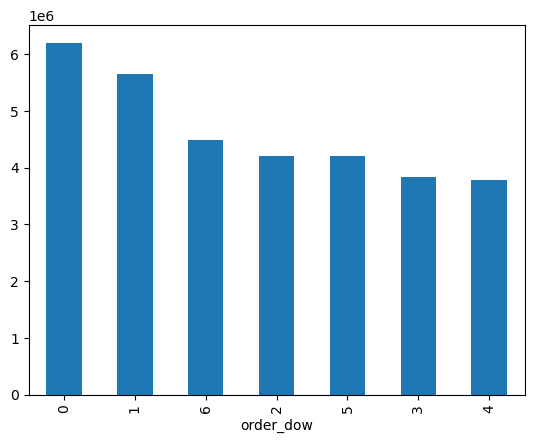

In [7]:
# Bar Chart
ords_prods_merge['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

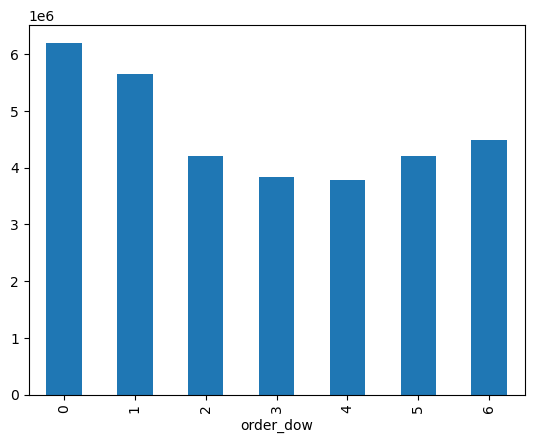

In [9]:
# Bar Chart - without ordering largest to smallest
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [10]:
# The same stick sort_index() can actually be used when priting frequencies
ords_prods_merge['order_dow'].value_counts()

order_dow
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [11]:
ords_prods_merge['order_dow'].value_counts().sort_index()

order_dow
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='order_dow'>

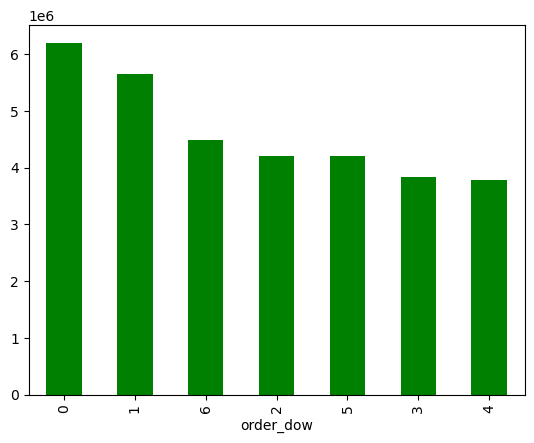

In [12]:
# Add color to the bar charts
ords_prods_merge['order_dow'].value_counts().plot.bar(color=['green'])

<Axes: xlabel='order_dow'>

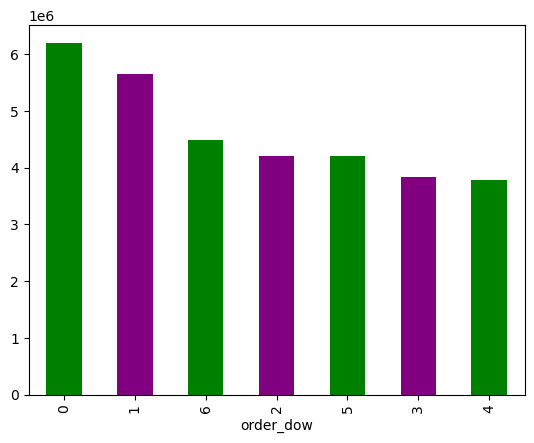

In [13]:
ords_prods_merge['order_dow'].value_counts().plot.bar(color=['green','purple'])

<Axes: xlabel='order_dow'>

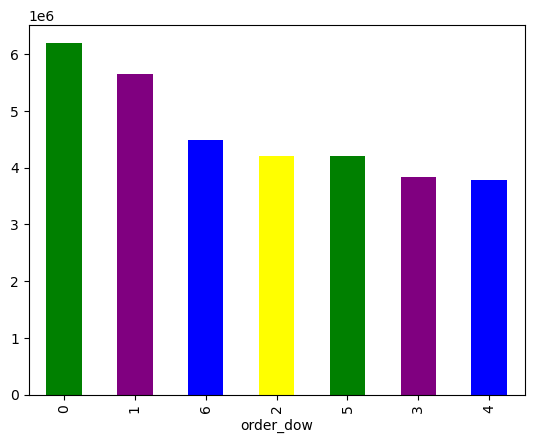

In [14]:
ords_prods_merge['order_dow'].value_counts().plot.bar(color=['green','purple', 'blue', 'yellow'])

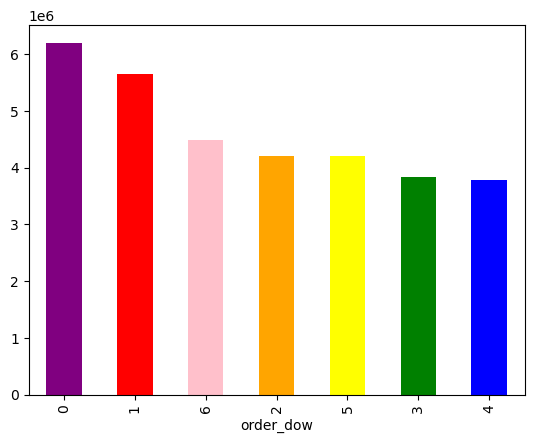

In [17]:
# Save the plot in Jupiter's memory
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

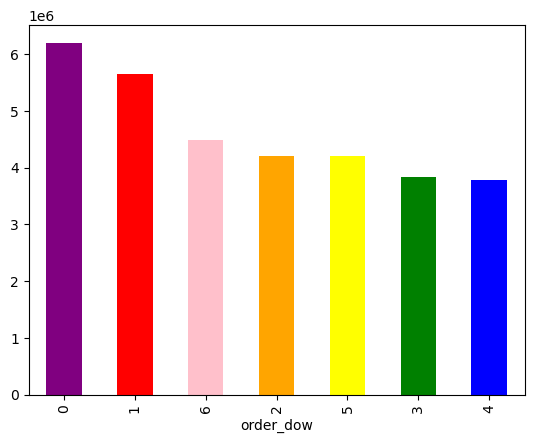

In [18]:
bar.figure

In [19]:
# Export the chart outside of Jupyter in the form of an image file - figure.savefig()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

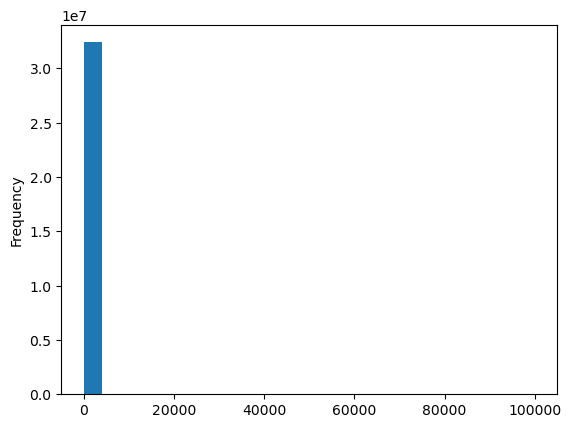

In [20]:
# Create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [21]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [22]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [23]:
ords_prods_merge['prices'].median()

7.4

In [24]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

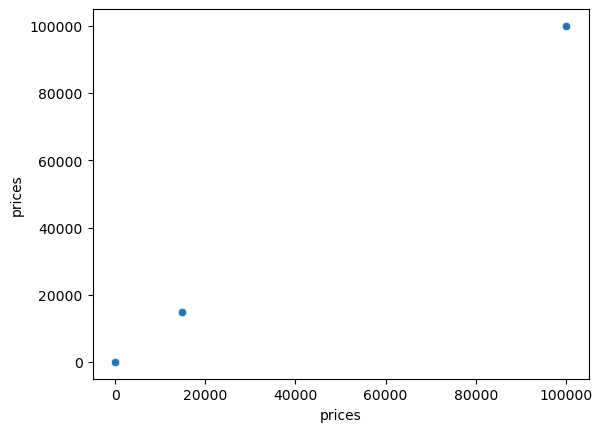

In [25]:
# Create a Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [26]:
# Let's investigate the close-to-20.000 value
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order,avg_spender,spender_flag,median_days_since_prior_order,frequency_flag
10030345,171,912404,17,prior,12,2,14,5.0,21553,5,...,NaN,Regularly busy,Most orders,40,Regular customer,108.648299,108.648299,High_spender,5.0,Frequent customer
10030346,181,603376,17,prior,22,6,16,4.0,21553,3,...,NaN,Regularly busy,Most orders,40,Regular customer,108.648299,108.648299,High_spender,5.0,Frequent customer
10030347,1944,3264360,135,prior,2,2,21,13.0,21553,6,...,NaN,Regularly busy,Average orders,4,New customer,1154.792308,1154.792308,High_spender,12.0,Regular customer
10030348,1945,892534,135,prior,3,0,8,12.0,21553,3,...,NaN,Busiest days,Average orders,4,New customer,1154.792308,1154.792308,High_spender,12.0,Regular customer
10030349,5708,229704,342,prior,8,1,19,30.0,21553,9,...,NaN,Busiest days,Average orders,16,Regular customer,114.426619,114.426619,High_spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,prior,29,0,8,4.0,33664,1,...,NaN,Busiest days,Average orders,39,Regular customer,1106.743956,1106.743956,High_spender,4.0,Frequent customer
29166210,3386544,2363282,204099,prior,31,0,9,2.0,33664,1,...,NaN,Busiest days,Most orders,39,Regular customer,1106.743956,1106.743956,High_spender,4.0,Frequent customer
29166211,3391313,3181945,204395,prior,13,3,15,8.0,33664,25,...,NaN,Slowest days,Most orders,15,Regular customer,451.153540,451.153540,High_spender,5.0,Frequent customer
29166212,3405096,2486215,205227,prior,7,3,20,4.0,33664,8,...,NaN,Slowest days,Average orders,12,Regular customer,1178.381871,1178.381871,High_spender,12.0,Regular customer


In [27]:
# Turn the prices > 100 into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [28]:
ords_prods_merge['prices'].max()

25.0

In [30]:
ords_prods_merge['prices'].value_counts()

prices
12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: count, Length: 240, dtype: int64

<Axes: ylabel='Frequency'>

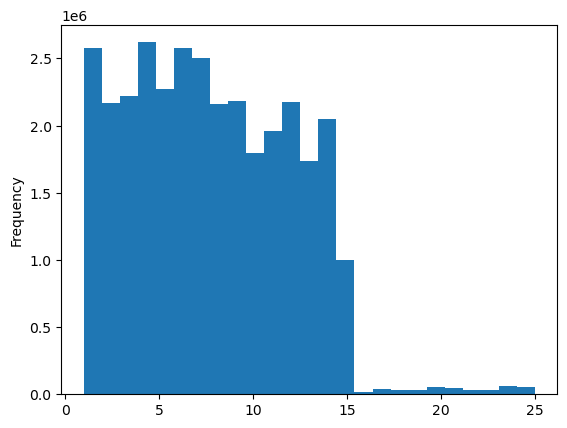

In [31]:
# Retry that histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

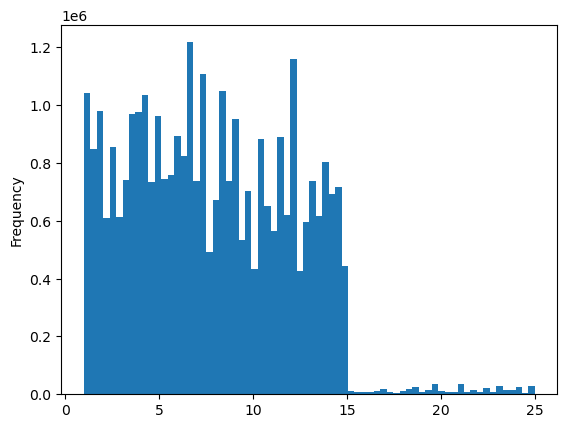

In [32]:
ords_prods_merge['prices'].plot.hist(bins = 70)

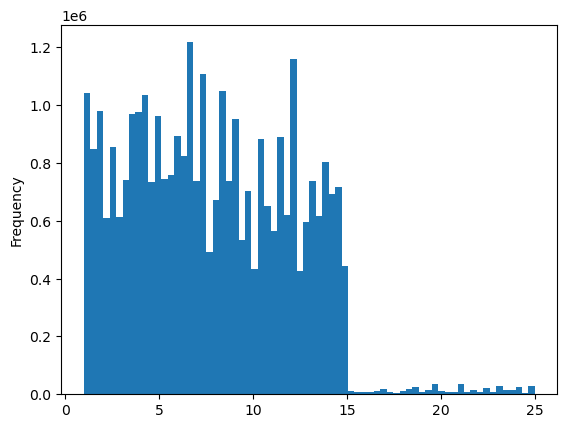

In [36]:
# Save the histogram in Jupiter's memory
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

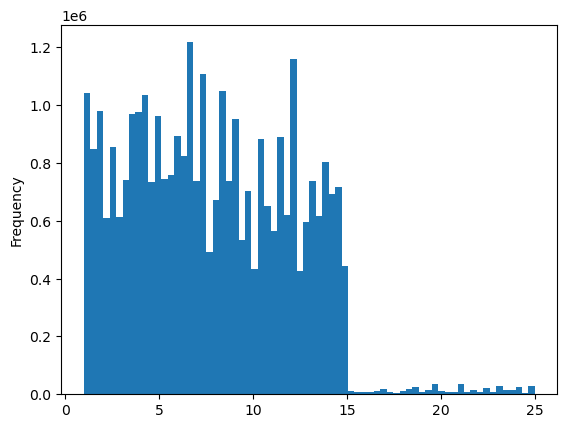

In [37]:
hist.figure

In [38]:
# Export the chart outside of Jupyter in the form of an image file - figure.savefig()
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [39]:
# Line Charts
# Sampling Data 70/30
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [40]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [41]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [42]:
len(ords_prods_merge)

32404859

In [43]:
len(big)+len(small)

32404859

In [44]:
# A new dataframe that contains only the "prices" and "order_dow" columns from small subset
df_2 = small[['order_dow','prices']]

In [45]:
df_2

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


In [46]:
# Create the line chart

C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


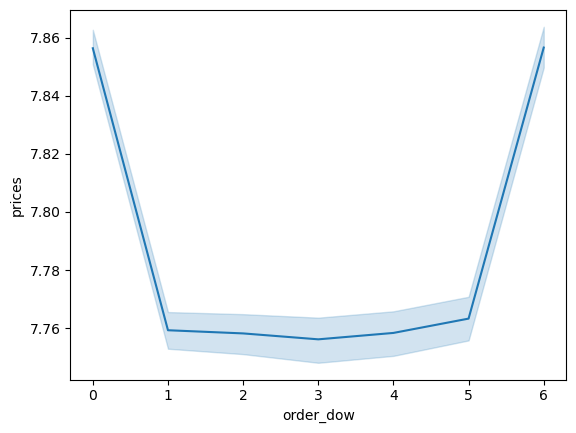

In [47]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


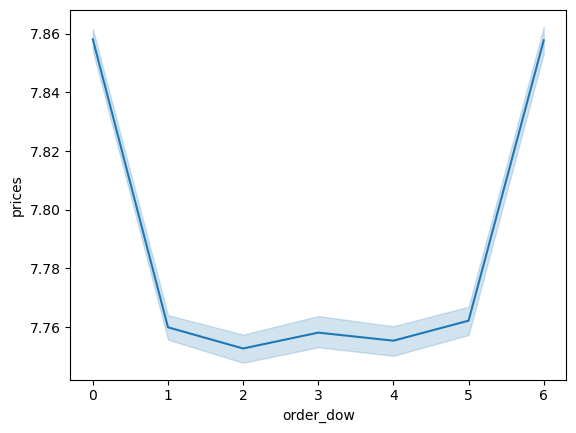

In [48]:
df_3 = big[['order_dow','prices']]
line = sns.lineplot(data = df_3, x = 'order_dow',y = 'prices')

C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


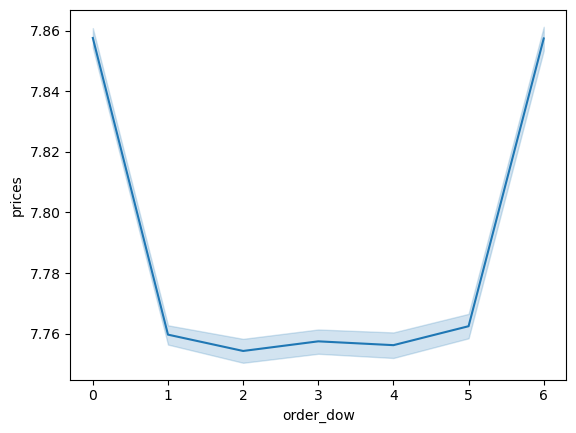

In [49]:
df_4= ords_prods_merge[['order_dow','prices']]
line = sns.lineplot(data = df_4, x = 'order_dow',y = 'prices')